#Loan Prediction

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

##Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(palette='viridis')
sns.set_style('whitegrid')
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.shape

(4269, 13)

##Data Cleaning

In [4]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [7]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [8]:
df = df.drop('loan_id', axis=1)

##Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [10]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [11]:
df.columns = ['no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [12]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [13]:
df['no_of_dependents'].value_counts()

no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

In [14]:
df['education'].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [15]:
df['self_employed'].value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [16]:
df['loan_term'].value_counts()

loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64

In [17]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [18]:
categorical_cols = ['no_of_dependents', 'education', 'self_employed', 'loan_status']

numerical_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

###Univariate Analysis

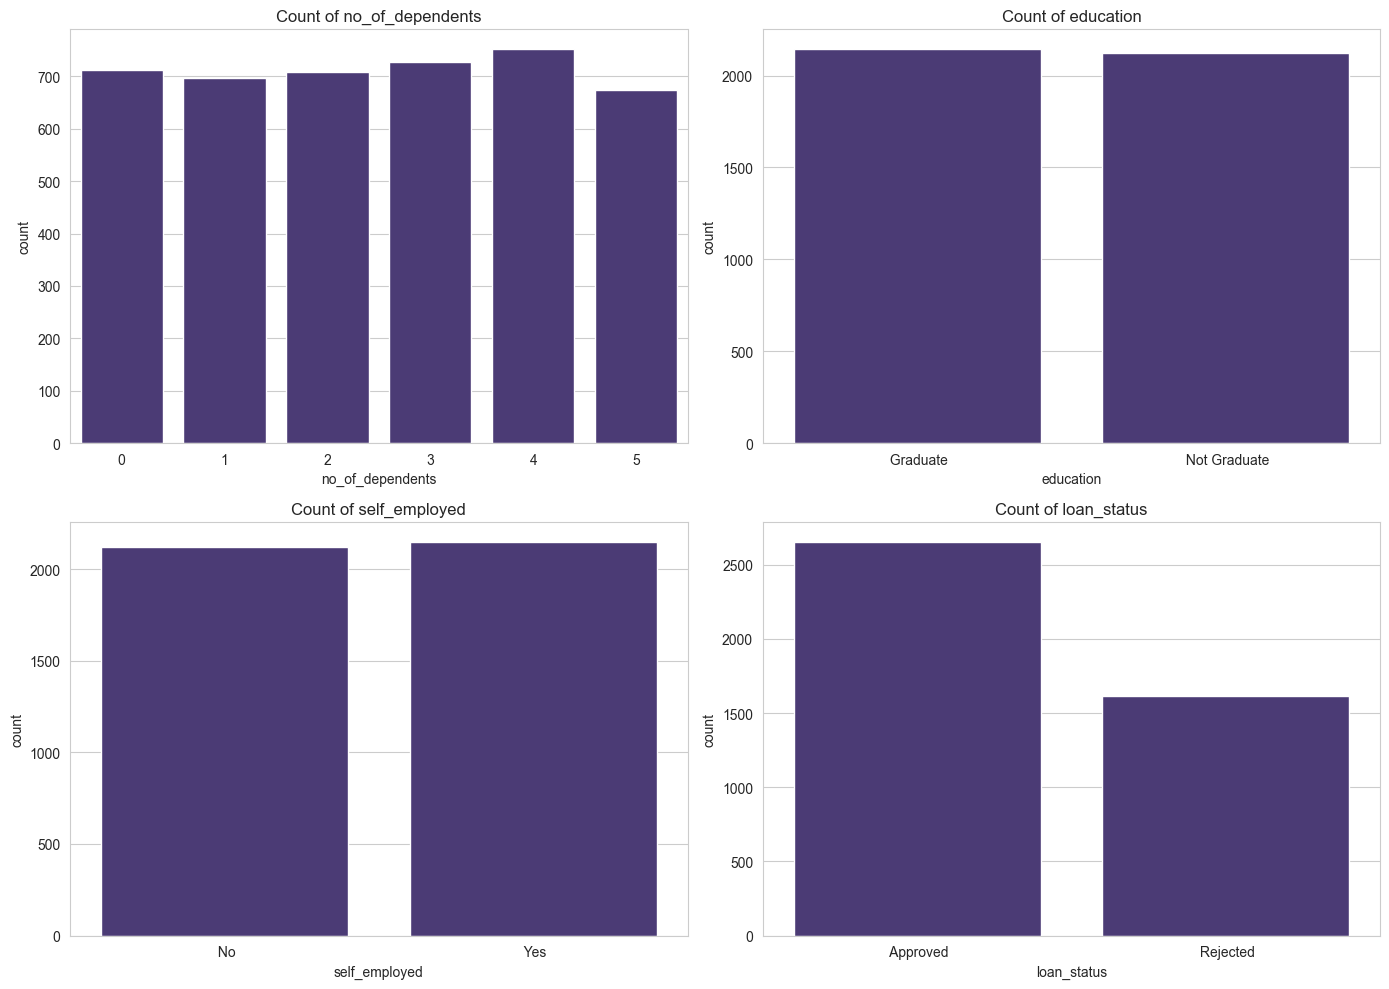

In [19]:
def univariate_categorical(ax, df, col):
  sns.countplot(x=df[col], data=df, ax=ax)
  ax.set_title(f'Count of {col}')
  ax.set_xlabel(f'{col}')
  ax.set_ylabel('count')


fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
  univariate_categorical(axes[i], df, col)

plt.tight_layout()
plt.show()

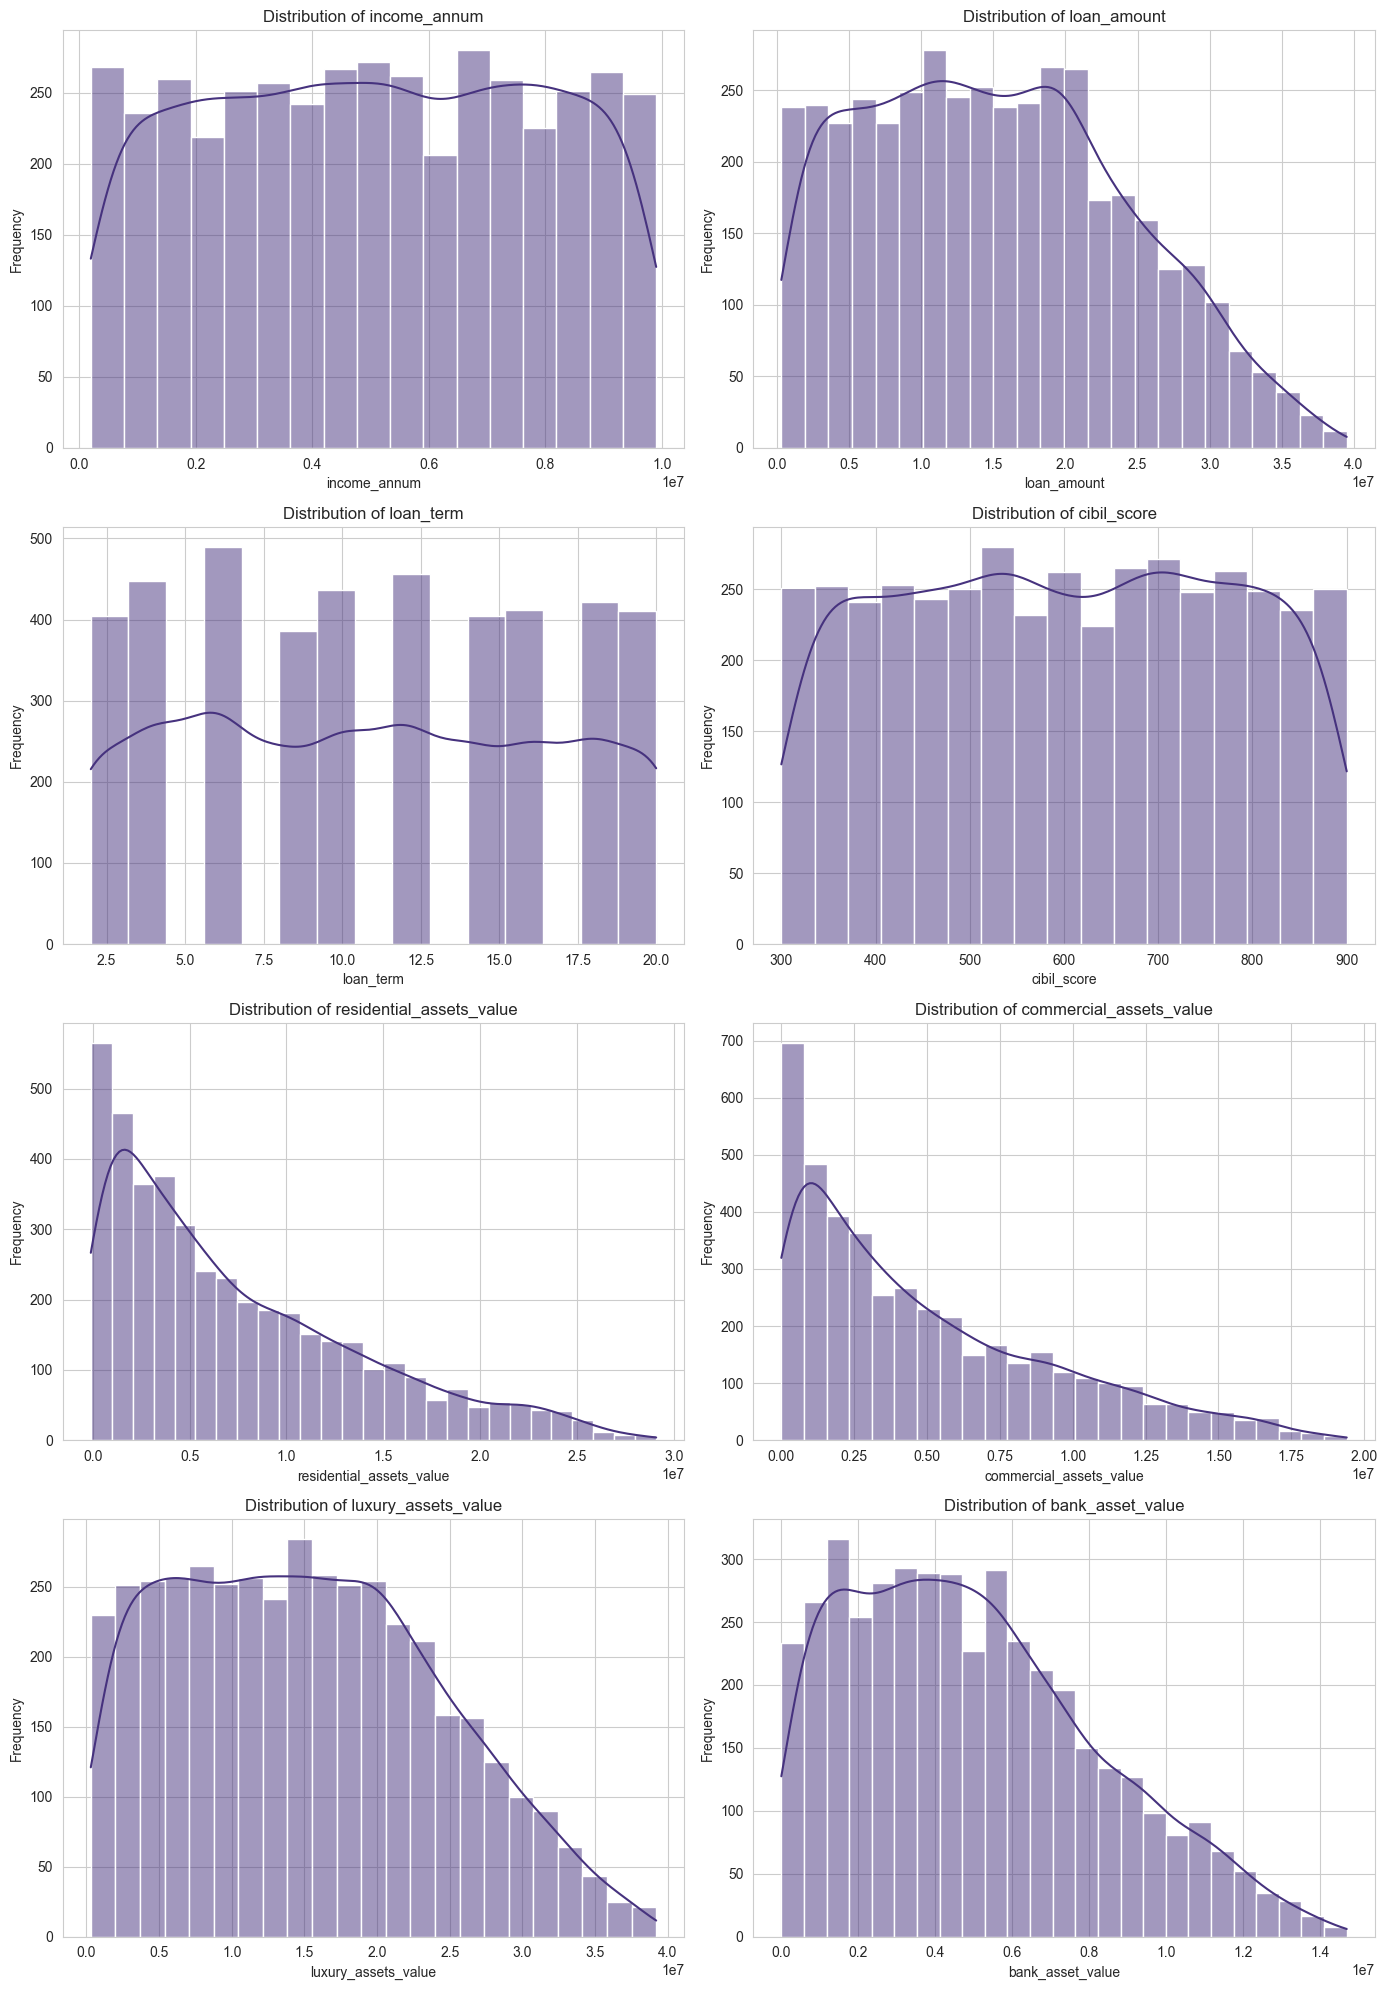

In [20]:
def univariate_numerical(ax, df, col):
  sns.histplot(x=df[col], data=df, kde=True, ax=ax)
  ax.set_title(f'Distribution of {col}')
  ax.set_xlabel(f'{col}')
  ax.set_ylabel('Frequency')

fig, axes = plt.subplots(4, 2, figsize=(14,20))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
  univariate_numerical(axes[i], df, col)

plt.tight_layout()
plt.show()

###Bivariate Analysis

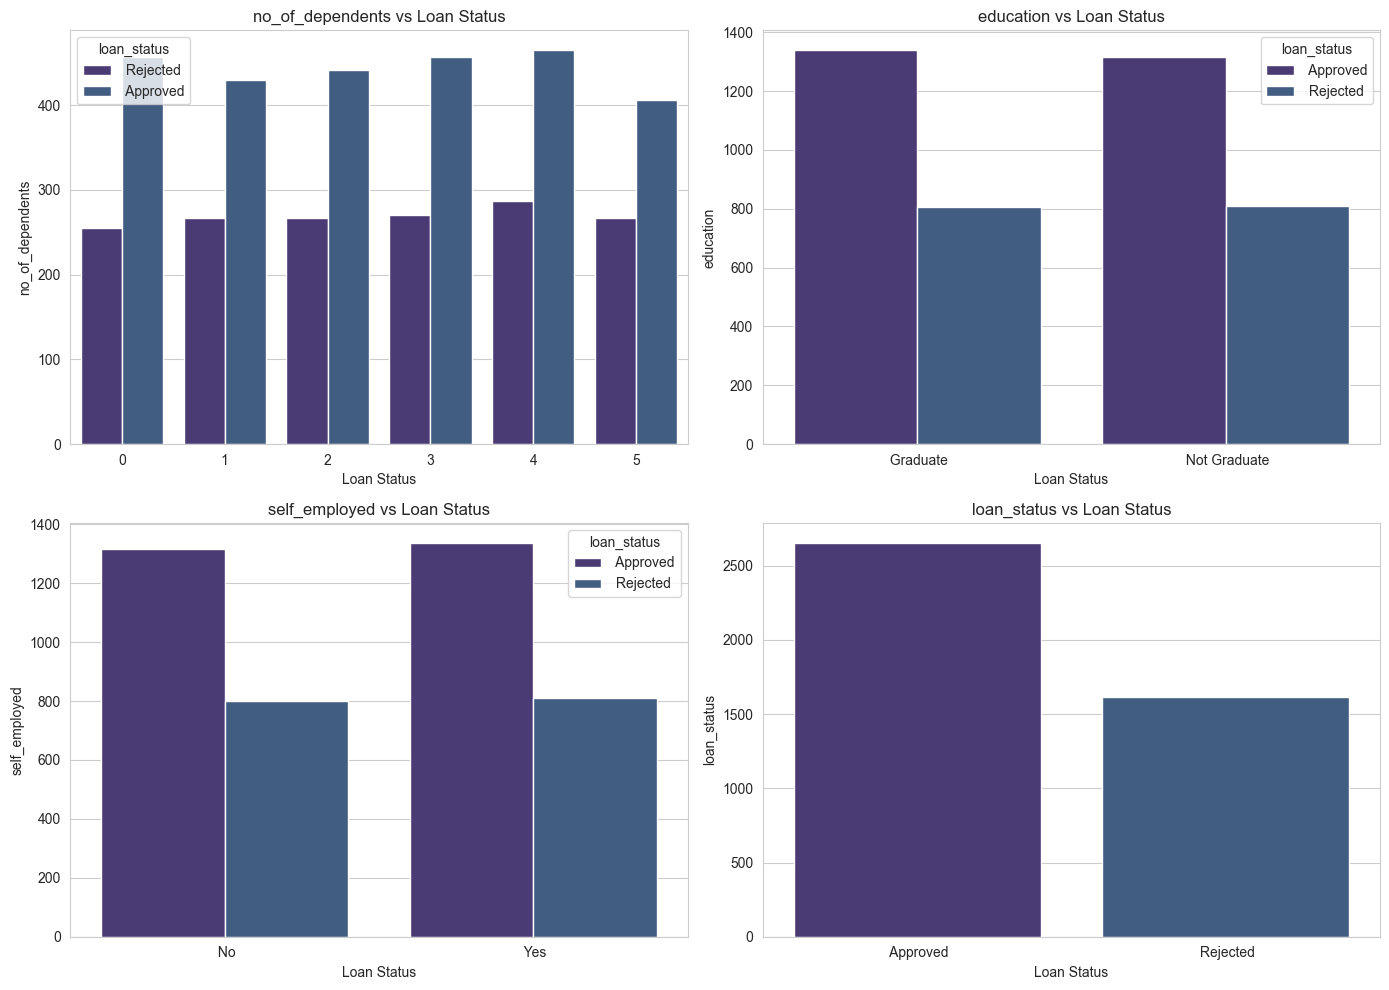

In [21]:
def bivariate_categorical(ax, df, col):
  sns.countplot(hue=df['loan_status'], x=df[col], data=df, ax=ax)
  ax.set_title(f'{col} vs Loan Status')
  ax.set_xlabel('Loan Status')
  ax.set_ylabel(f'{col}')

fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
  bivariate_categorical(axes[i], df, col)

plt.tight_layout()
plt.show()

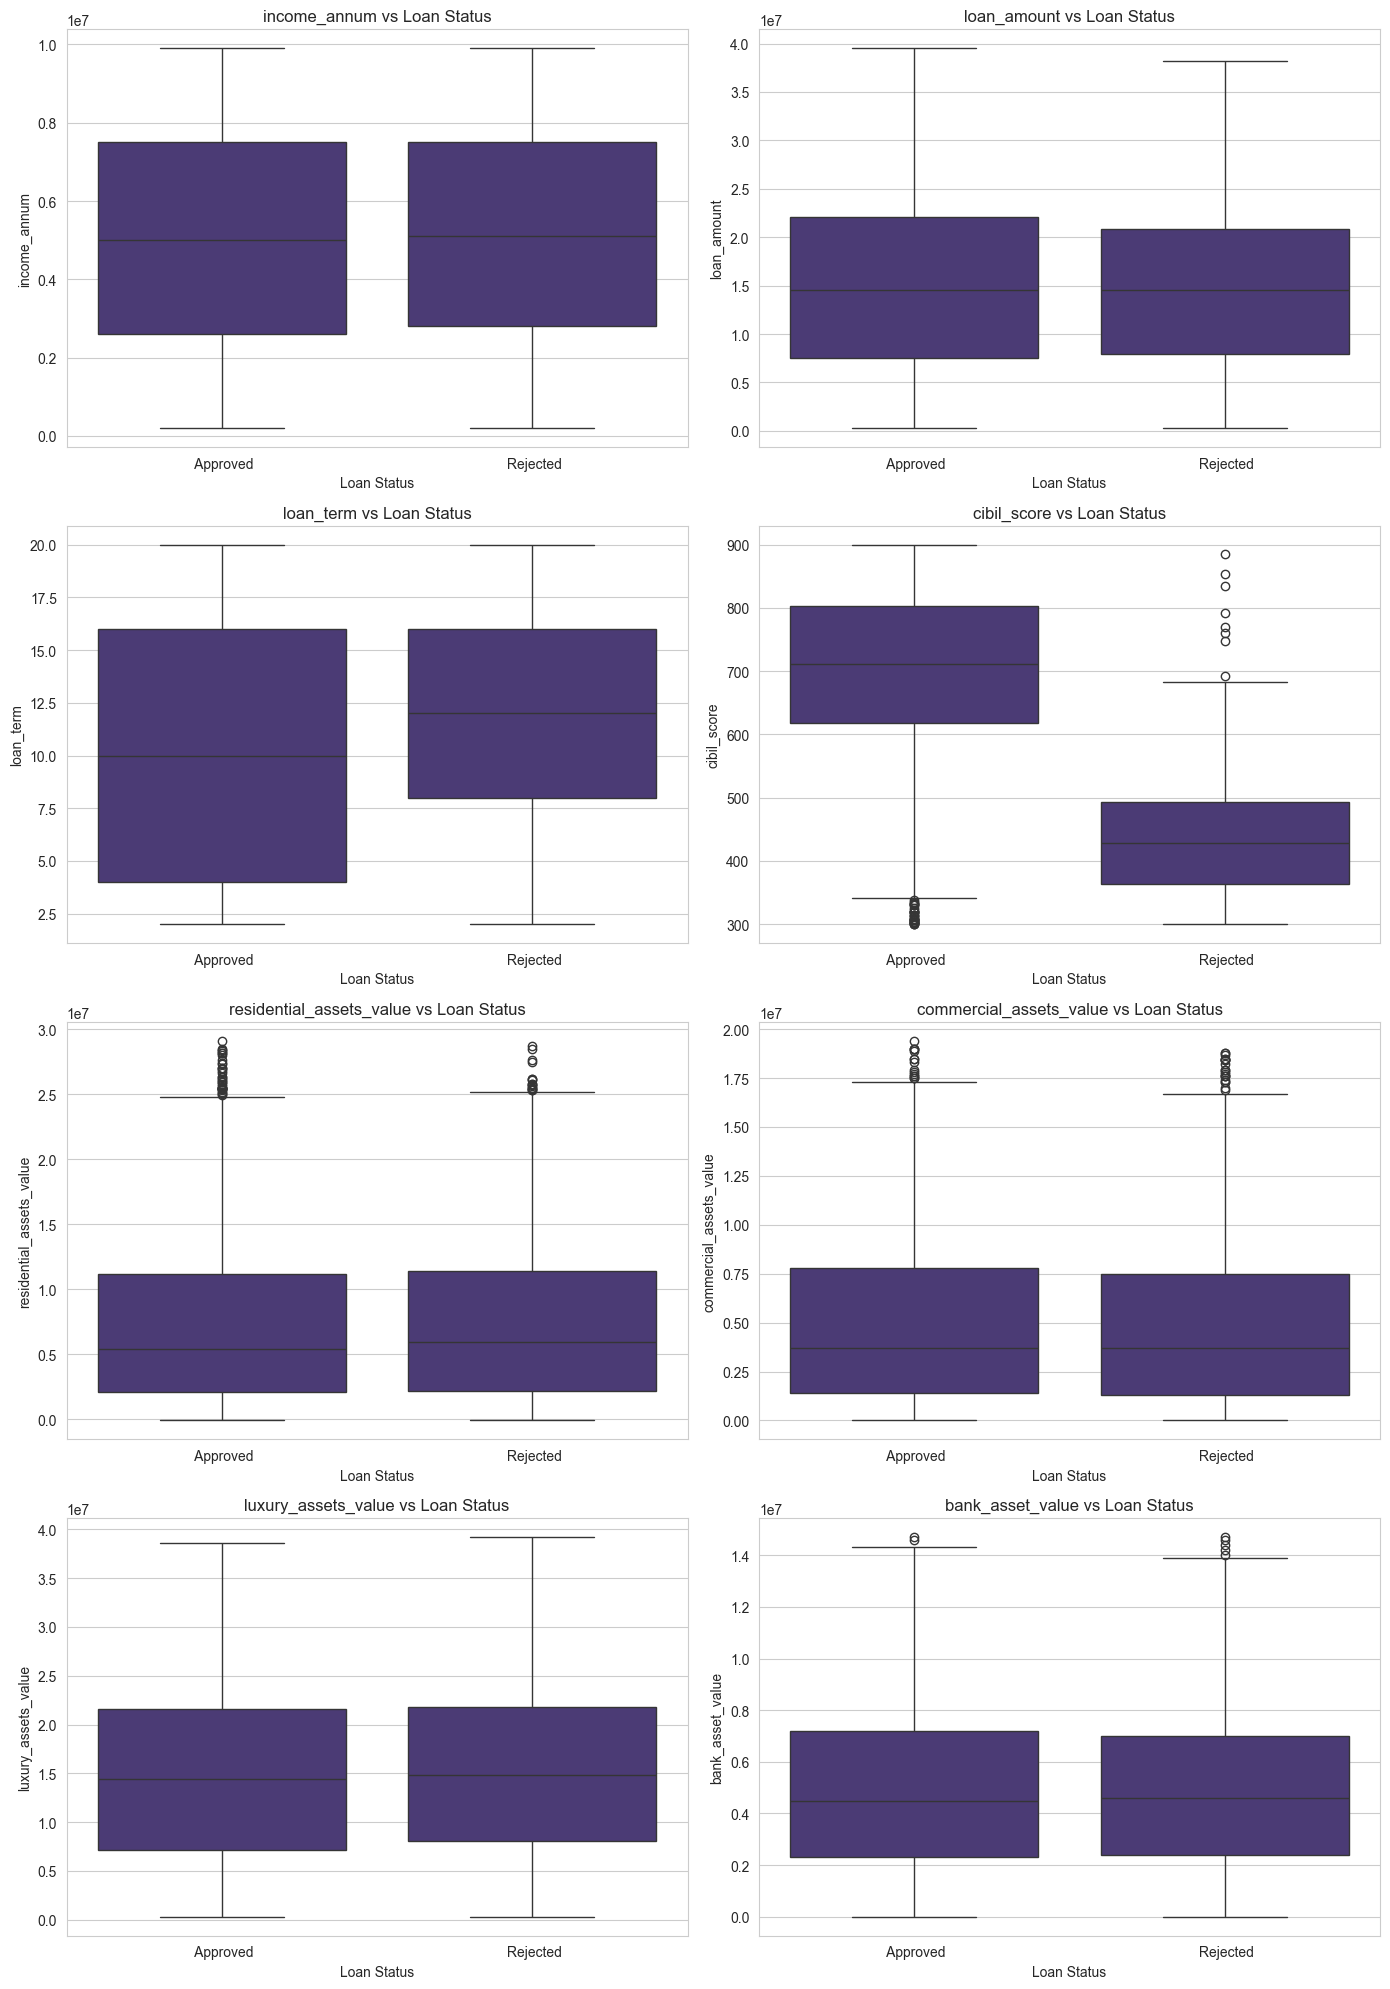

In [22]:
def bivariate_numerical(ax, df, col):
  sns.boxplot(x=df['loan_status'], y=df[col], data=df, ax=ax)
  ax.set_title(f'{col} vs Loan Status')
  ax.set_xlabel('Loan Status')
  ax.set_ylabel(f'{col}')

fig, axes = plt.subplots(4, 2, figsize=(14,20))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
  bivariate_numerical(axes[i], df, col)

plt.tight_layout()
plt.show()

##Train-Test-Split

In [23]:
le = LabelEncoder()
y = le.fit_transform(df['loan_status'])
X = df.drop('loan_status', axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Preprocessing

scaling, encoding

In [25]:
X_train.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [26]:
print(numerical_cols)

['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [27]:
num_features = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                'residential_assets_value', 'commercial_assets_value',
                'luxury_assets_value', 'bank_asset_value']

cat_features = ['education', 'self_employed']

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('Scaling', RobustScaler(), num_features),
        ('Encoding', OneHotEncoder(), cat_features)
    ]
)

##Training and Evaluation

In [29]:
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('RandomForest', RandomForestClassifier(max_depth=None, n_estimators=100))
])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [30]:
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('LogisticRegression', LogisticRegression())
])

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

Classification report of Random Forest: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion matrix of Random Forest: 



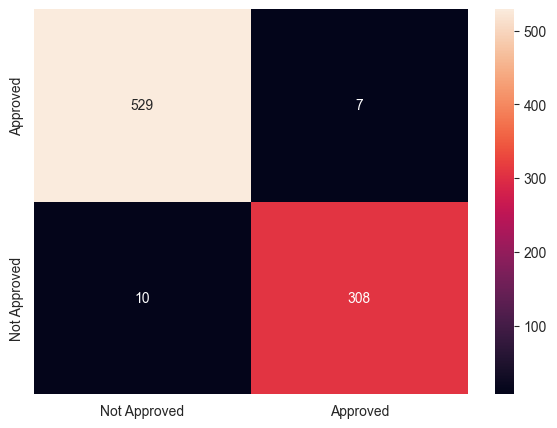

In [31]:
print("Classification report of Random Forest: \n", classification_report(y_test, y_pred_rf))
print("Confusion matrix of Random Forest: \n")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(7,5))
sns.heatmap(cm_rf, annot=True, fmt='d', yticklabels=['Approved', 'Not Approved'], xticklabels=['Not Approved', 'Approved'])
plt.show()

Classification report of Logistic Regression: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       536
           1       0.88      0.87      0.88       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854

Confusion matrix of Logistic Regression: 



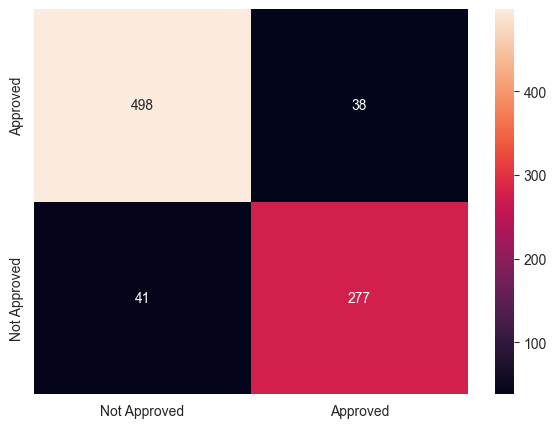

In [32]:
print("Classification report of Logistic Regression: \n", classification_report(y_test, y_pred_lr))
print("Confusion matrix of Logistic Regression: \n")
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(7,5))
sns.heatmap(cm_lr, annot=True, fmt='d', yticklabels=['Approved', 'Not Approved'], xticklabels=['Not Approved', 'Approved'])
plt.show()

In [37]:
import joblib

filename = "rf_pipeline.pkl"
joblib.dump(rf, open(filename, "wb"))

In [38]:
import sklearn
print(sklearn.__version__)

1.7.1


In [39]:
print(le.classes_)

[' Approved' ' Rejected']
